In [1]:
#an introduction to class
class snake:
    def __init__(self, name):
        self.name = name
    
    def chnage_name(self, new_name):
        self.name = new_name

In [2]:
#creating object or instance of a class
n = snake('p')

In [3]:
#access variable in that class
n.name

'p'

In [4]:
#accessing function through object
n.chnage_name("anakonda")

In [5]:
n.name

'anakonda'

In [6]:
p = snake('anakonda')

In [7]:
p.name

'anakonda'

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [9]:
#loading iris data, need internet to load data
iris = datasets.load_iris()

In [10]:
#find data size
iris.data.shape

(150, 4)

In [11]:
#assign three columns as X
X = iris.data[:, :2]

In [12]:
#access iris target (exists predefined in dataset)
y = (iris.target != 0) * 1

In [13]:
#all X for ehich target is 0
X[y == 0][:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

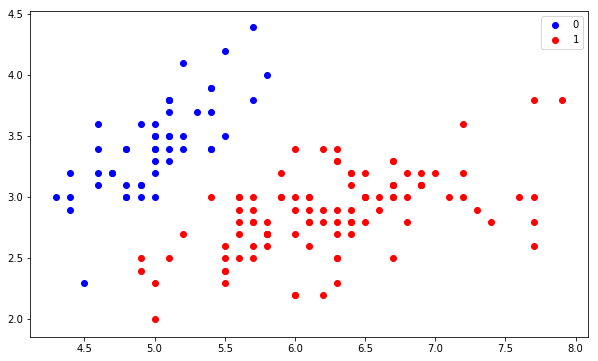

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0') #all X for ehich target is 0
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1') #all X for ehich target is 1
plt.legend();

\begin{align}
sigmoid(z) = \frac{1}{ ( 1 + e^{-z} ) }
\end{align}

In [15]:
class LogisticRgression:
    # declaring __init__ function with gobal values
    def __init__ (self, lr = 0.01, num_iter = 100000, fit = True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit
        
    # inserting column vector of ones as first column to X
    def __add_inercept(self, X):
        ones = np.ones((X.shape[0],1))
        return np.concatenate((ones, X), axis = 1)
    
    # finding sigmoid
    def __sigmoid(self,z):
        return 1 / ( 1 + np.exp(-z))
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_inercept(X)
            
        #weights
        self.theta = np.zeros(X.shape[1])
        
        #run gradient descent algorithm
        for i in range(self.num_iter):
            z = np.dot(X,self.theta)
            h = self.__sigmoid(z)
            
            gradient = np.dot(X.T, (y-h))#/y.size
            self.theta += self.lr*gradient #make theta global, so that we can access anywhere in class
            
    def predict_probs(self, X):
        if self.fit_intercept:
            X = self.__add_inercept(X)
            
        return self.__sigmoid(np.dot(X,self.theta))
    
    #predict for given X, and retuen round off values
    def predict(self,X):
        return self.predict_probs(X).round()

In [16]:
#create objet and pass required paramters
model = LogisticRgression(lr = 0.1, num_iter=1000)

In [17]:
#find out time taken by above piece of code
%timeit model.fit(X,y)

55.7 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
#obtained theta
model.theta

array([-39.61550855,  59.35348588, -93.16223407])

In [20]:
parameters = model.theta
x_values = [np.min(X[:, 0] - 5), np.max(X[:, 1] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

In [21]:
print(x_values)
print(y_values)

[-0.7000000000000002, 9.4]
[-0.87120011  5.56349109]


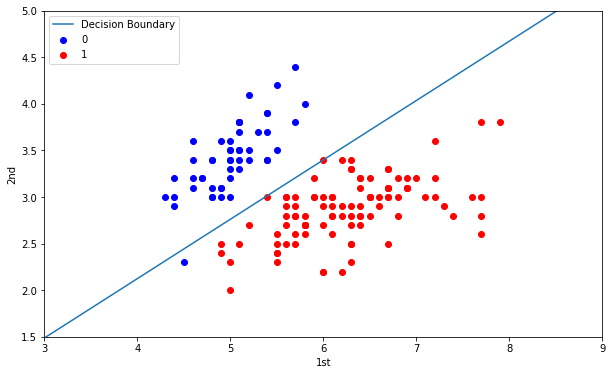

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.legend()

plt.xlim(3,9)
plt.ylim(1.5,5)
plt.show()

In [24]:
#find total number of my predicted data actually matching real data, and find mean of that total number
preds = model.predict(X)
(preds == y).mean()

0.9866666666666667

In [25]:
#with different learning rate and number of iteration(required for gradient descent)
model = LogisticRgression(lr = 0.1, num_iter=300000)

In [26]:
%timeit model.fit(X,y)

15.3 s ± 256 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
model.theta

array([-119.30277515,   46.73023521,  -41.78373996])

In [28]:
preds = model.predict(X)
(preds == y).mean()

1.0